<a href="https://colab.research.google.com/github/Team-Takeoff/Capstone/blob/main/models/Test_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Evaluation Notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install scikeras

In [3]:
!pip install dill

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 3.1 MB/s eta 0:00:00


In [4]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00


In [5]:
# get our files json so we can use json instead of actual file paths
import json
path_to_files_json = '/content/drive/Shareddrives/STUDENT-Capstone SS23/files.json'
files = json.load(open(path_to_files_json,'r'))

In [6]:
# These next few lines enable access to the py files that contain the custom build function and metric for the NN model
import sys
model_dir = files['Dirs']['Main']
project_dir = files['Dirs']['Model']
sys.path.append(model_dir)
sys.path.append(model_dir + project_dir)

In [7]:
# primary python packages for data manipulation/viz
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import joblib
import dill
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Sklearn packages
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score, RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report


# Keras and TensorFlow packages
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Reshape, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import save_model, load_model
import keras.metrics
import keras.losses
from keras import backend as K


# from scikeras.wrappers import KerasClassifier
from NN_model import custom_f1, XTransform, create_model

pd.options.display.min_rows = 200

##Load, Transform Data & Compare Model Performance

In [8]:
preprocessor = joblib.load(files['Models']['pipe'])

In [9]:
lr = joblib.load(files['Models']['LR'])

In [10]:
rf = joblib.load(files['Models']['RF'])

In [11]:
gb = joblib.load(files['Models']['GB'])

In [12]:
# Load the pipeline first:
nn = joblib.load(files['Models']['NN_pipe'])


# # Then, load the Keras model:
model = load_model('/content/drive/Shareddrives/STUDENT-Capstone SS23/Models/best_model.h5',
                  custom_objects={'create_model': create_model, 'custom_f1': custom_f1})

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator FunctionTransformer from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ColumnTransformer from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk

In [13]:
# Add the keras model back into the pipeline's KerasClassifier (for convenience)
nn.named_steps['model'].model = model

In [14]:
# Process set according to how most of the models were trained
use_cols=['DestAirportSeqID', 'DestStateFips', 'CRSElapsedTime', 'Distance', 'OriginAirportSeqID',
          'Reporting_Airline_AA', 'Reporting_Airline_AS', 'Reporting_Airline_B6', 'Reporting_Airline_CO', 'Reporting_Airline_DL',
          'Reporting_Airline_F9', 'Reporting_Airline_FL', 'Reporting_Airline_MQ', 'Reporting_Airline_NK', 'Reporting_Airline_UA',
          'Reporting_Airline_US', 'Reporting_Airline_VX', 'mfr_AIRBUS', 'mfr_BOEING', 'engine_type_Reciprocating',
          'engine_type_Turbofan', 'engine_type_Turbojet', 'w_type_9', 'w_type_C', 'w_type_N', 'w_type_V',
          'sky_c_det_9', 'sky_c_det_C', 'sky_c_det_M', 'sky_c_det_W', 'sky_cov_00', 'sky_cov_02', 'sky_cov_04',
          'sky_cov_07', 'sky_cov_08', 'sky_cov_09', 'sky_cov_10', 'sky_obs_tot_cov_00',
          'sky_obs_tot_cov_01', 'sky_obs_tot_cov_02', 'sky_obs_tot_cov_04', 'sky_obs_tot_cov_06', 'sky_obs_tot_cov_07',
          'sky_obs_tot_cov_08', 'sky_obs_tot_cov_09', 'w_type_d_9', 'w_type_d_C', 'w_type_d_N', 'w_type_d_V',
          'sky_c_det_d_9', 'sky_c_det_d_C', 'sky_c_det_d_M','sky_c_det_d_W', 'sky_cov_d_00', 'sky_cov_d_02', 'sky_cov_d_04', 'sky_cov_d_07', 'sky_cov_d_08', 'sky_cov_d_09',
          'sky_cov_d_10', 'sky_obs_tot_cov_d_00', 'sky_obs_tot_cov_d_01', 'sky_obs_tot_cov_d_02',
          'sky_obs_tot_cov_d_03', 'sky_obs_tot_cov_d_04', 'sky_obs_tot_cov_d_06', 'sky_obs_tot_cov_d_07', 'sky_obs_tot_cov_d_08',
          'sky_obs_tot_cov_d_09', 'CRSDepHour', 'passengers', 'no_engines', 'w_dir_angle',
          'w_speed_rate', 'sky_c_hgt', 'vis_dist', 'tmp_air', 'tmp_dew', 'sea_lvl_p', 'liq_precip_qty', 'liq_precip_dim',
          'liq_precip_cond', 'sky_cov_base_hgt', 'sky_cov_cld', 'sky_sum_cov', 'sky_sum_hgt', 'sky_low_cld_base_hgt',
          'at_pres_altimeter_rate', 'at_pres_stn_rate', 'w_dir_angle_d', 'w_speed_rate_d', 'sky_c_hgt_d', 'vis_dist_d',
          'tmp_air_d', 'tmp_dew_d', 'sea_lvl_p_d', 'liq_precip_qty_d', 'liq_precip_dim_d', 'liq_precip_cond_d',
          'sky_cov_base_hgt_d', 'sky_cov_cld_d', 'sky_sum_cov_d', 'sky_sum_hgt_d', 'sky_low_cld_base_hgt_d',
          'at_pres_altimeter_rate_d', 'at_pres_stn_rate_d']

features_to_scale = ['CRSElapsedTime', 'Distance', 'passengers', 'OriginAirportSeqID','DestAirportSeqID',
               'w_dir_angle','w_speed_rate','sky_c_hgt','vis_dist','tmp_air','tmp_dew',
              'sea_lvl_p','liq_precip_qty','liq_precip_dim','sky_cov_base_hgt','sky_cov_cld','sky_sum_cov','sky_sum_hgt',
              'sky_low_cld_base_hgt','at_pres_altimeter_rate','at_pres_stn_rate','w_dir_angle_d',
              'w_speed_rate_d','sky_c_hgt_d','vis_dist_d','tmp_air_d','tmp_dew_d',
              'sea_lvl_p_d','liq_precip_qty_d','liq_precip_dim_d','liq_precip_cond_d','sky_cov_base_hgt_d',
              'sky_cov_cld_d', 'sky_sum_cov_d','sky_sum_hgt_d','sky_low_cld_base_hgt_d','at_pres_altimeter_rate_d',
              'at_pres_stn_rate_d']

In [15]:
len(use_cols)

106

In [16]:
# Prepare the X_dataset. 2 verions - one for Neural Net and one for the others
test_set = pd.read_parquet(files['Final_Sets']['Test_set'])
nn_test_set = test_set.copy()
test_set.rename(columns={'DayofMonth':'Day'},inplace=True)
test_set['Date']=pd.to_datetime(test_set[['Year', 'Month', 'Day']])
test_set.drop(['Month', 'Day','Quarter','DayOfWeek'], axis=1,inplace=True)
test=test_set[use_cols].copy()
y_test=test_set[['Weather_Label']]
test[features_to_scale] = preprocessor.transform(test[features_to_scale])
test.shape

(56924, 106)

In [17]:
y_test=test_set[['Weather_Label']]
y_test.value_counts()

Weather_Label
0                55863
1                 1061
dtype: int64

In [18]:
# Use helper functions to assist with generating probabilities and graphs

def predict_binary(y_proba, threshold=0.5):
  # Keras outputs probabilies, this function will convert to label predictions
  binary_predictions = np.where(y_proba > threshold, 1, 0)
  return binary_predictions



def generate_matrix(y_true,predictions, y_pred_probability,m_name):
  print(f'F1 Score for {m_name}:', f1_score(y_true, predictions, average='weighted'))
  cm = confusion_matrix(y_true,predictions,labels=[0,1])
  return cm

In [19]:
models = {'Logistic regression':{'model':lr},'Random Forest':{'model': rf},
          'Neural Network':{'model':nn},
          'Gradient Boosting':{'model':gb}
}

In [20]:
lst_preds = []
for k,v in models.items():

  # we have to have special procedures for the nn given the output is from Keras
  if k == 'Neural Network':
    nn_X_test = nn.named_steps['scale'].transform(nn_test_set)
    X_test = nn.named_steps['tensor'].transform(nn_X_test)
    y_preds_proba = v['model'].named_steps['model'].model.predict(X_test)
    y_preds = predict_binary(y_preds_proba)
    lst_preds.append(y_preds.ravel())
  else:
    y_preds = v['model'].predict(test)
    y_preds_proba = v['model'].predict_proba(test)[:,1]
    lst_preds.append(y_preds)


  fpr, tpr, thres = roc_curve(y_test,y_preds_proba)
  models[k]['fpr'] = fpr
  models[k]['tpr'] = tpr
  models[k]['thres'] = thres
  models[k]['metrics'] = {}
  models[k]['metrics']['accuracy'] = accuracy_score(y_test,y_preds)
  models[k]['metrics']['precision'] = round(precision_score(y_test,y_preds,average='weighted'),3)
  models[k]['metrics']['recall'] = round(recall_score(y_test,y_preds,average='weighted'),3)
  models[k]['metrics']['f1'] = round(f1_score(y_test, y_preds,average='weighted'),3)
  models[k]['metrics']['auc'] = round(roc_auc_score(y_test,y_preds_proba,average='weighted',),3)
  models[k]['metrics']['overall_fpr'] = 1 - round(recall_score(y_test,y_preds, pos_label=0),3)
  cm = confusion_matrix(y_test,y_preds,labels=[0,1])
  models[k]['metrics']['confusion'] = cm


1779/1779 [==============================] - 2s 974us/step


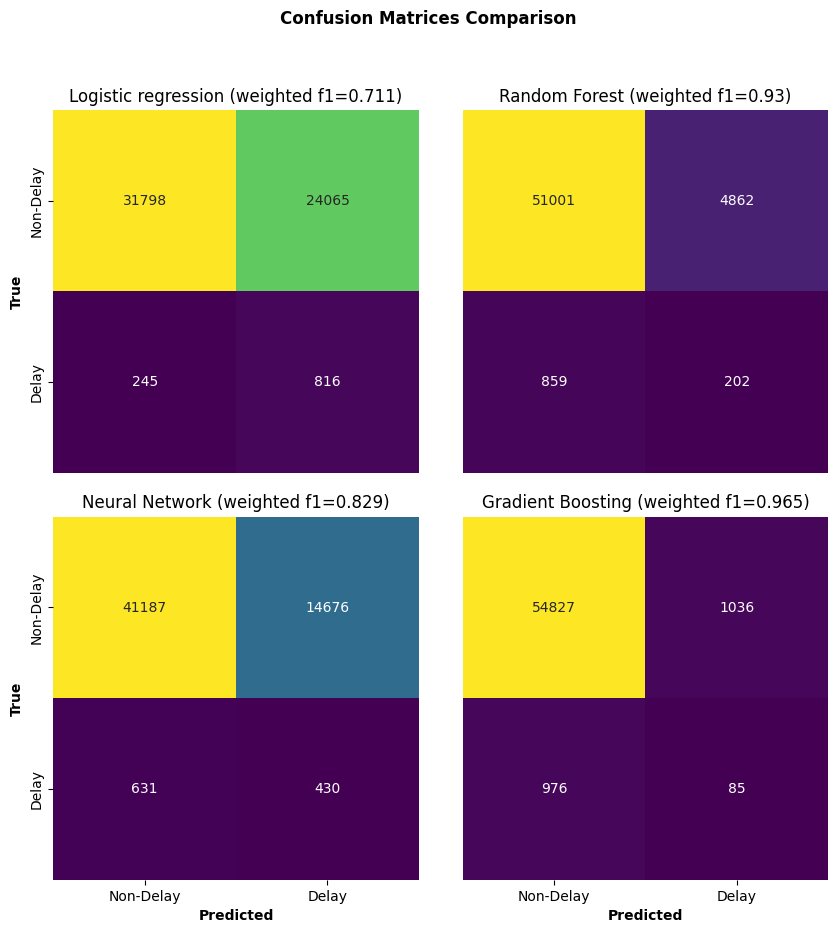

In [ ]:
#Plot the Confusion Matrices

fig = plt.figure(figsize=(10,10))
gs = GridSpec(2, 2, figure=fig, hspace=0.12, wspace=0.12)

i = 0
for k, v in models.items():

  cm = models[k]['metrics']['confusion']
  if i % 2 != 0:
      cbar = True
  else:
      cbar = False

  ax = fig.add_subplot(gs[i])
  sns.heatmap(cm, annot=True, ax=ax,fmt='g', cmap='viridis', cbar=False)
  if i in [0,2]:
    ax.set_yticklabels(['Non-Delay','Delay'])
  else:
    ax.set_yticks([])
  if i in [0,2]:
    ax.set_ylabel('True',fontweight="bold")
  if i in [2,3]:
    ax.set_xlabel('Predicted',fontweight="bold")
    ax.set_xticklabels(['Non-Delay','Delay'])
  else:
    ax.set_xticks([])

  ax.set_title(f"{k} (weighted f1={models[k]['metrics']['f1']})")
  i+=1
plt.suptitle("Confusion Matrices Comparison",fontweight="bold")

fig.savefig('/content/drive/Shareddrives/STUDENT-Capstone SS23/ConfusionMatrix.jpg',dpi=800)
fig.show()

## Ensembling the Models Together
It's worth looking at ensembling the models. In this test, we will get the output predictions across the 4 models per sample.  We will take the most frequently predicted class as the ensemble's prediction. If there is a tie where 2 predict 0 and the others predict 1, we will take a conservative approach and select 0 to reduce the chance of false positives - an identified potential harm.

In [ ]:
# prepare the predictions into a dataframe. If NaN here simply means the class
# wasn't the most chosen because we're using the mode method.
df_preds = pd.DataFrame(lst_preds).T
comp_preds = df_preds.mode(axis=1)
comp_preds.head()


,0,1
0,0.0,NaN
1,0.0,NaN
2,0.0,NaN
3,0.0,NaN
4,0.0,NaN


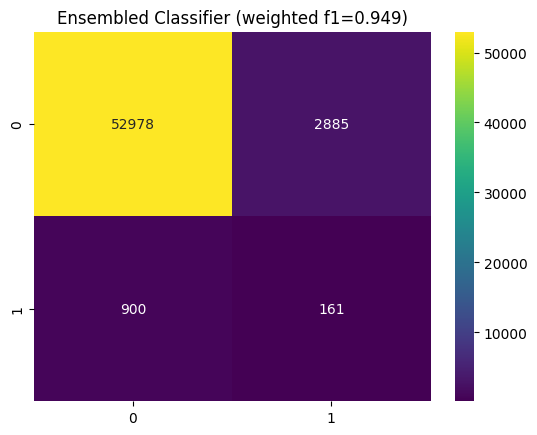

In [ ]:
  comp_preds['pred'] = comp_preds.apply(lambda x: 0 if pd.isnull(x).any()==False else x.max(),axis=1)
  f1 = round(f1_score(y_test, comp_preds['pred'],average='weighted'),3)
  cm = confusion_matrix(y_test,comp_preds['pred'],labels=[0,1])
  sns.heatmap(cm, annot=True, fmt='g', cmap='viridis')
  plt.title(f"Ensembled Classifier (weighted f1={f1})");


##ROC Curve Comparison

In [ ]:
import matplotlib.pyplot as plt
import kaleido

In [ ]:
lst_df = []
for k,v in models.items():
  fpr = v['fpr'].reshape(-1,1)
  tpr = v['tpr'].reshape(-1, 1)
  data=np.hstack((fpr,tpr))
  tmp = pd.DataFrame(data,columns=['fpr','tpr'],
                     index=[x for x in range(0,len(data))])
  tmp['model'] = f"{k} (area={v['metrics']['auc']})"
  lst_df.append(tmp)

# Create a baseline performance line.  This represents an AUC of .5
fpr=np.array([-0.01,1]).reshape(-1,1)
tpr = np.array([-0.01,1]).reshape(-1,1)
data = np.hstack((fpr,tpr))
tmp = pd.DataFrame(data,columns=['fpr','tpr'],
                     index=[x for x in range(0,len(data))])
tmp['model'] = 'baseline'
lst_df.append(tmp)


#Combine all of the dataframes and plot out all the lines
# Show the baseline as a dashed line
data = pd.concat(lst_df).reset_index(drop=True)

fig = px.line(data_frame=data,
        x='fpr', y='tpr',
        color='model',
        line_dash = 'model',
        line_dash_sequence=['solid','solid','solid','solid','dash'],
        width=750,
        height=750,
        labels = {'tpr': 'True Positive Rate',
                  'fpr': 'False Positive Rate'}
       )


# code for positioning legend:
# https://stackoverflow.com/questions/60123611/how-to-position-legends-inside-a-plot-in-plotly

fig.update_layout(
    title=dict(text="ROC Curve Comparison",x=.5),
    xaxis_range=[0.00, 1],
    yaxis_range=[0.00, 1],

    legend=dict(
        x=.55,
        y=.1,
        traceorder="normal",
        ),
)
fig.show()



In [ ]:
# See all of the metrics in a tabular format

met_df = pd.DataFrame([models[x]['metrics'] for x in models.keys()])
model_names = ['linear regression','random forest','neural network','gradient boosting']
met_df.insert(0,'models',model_names)
met_df[['models','accuracy','precision','recall','f1','auc']]

,models,accuracy,precision,recall,f1,auc
0,linear regression,0.572939,0.974,0.573,0.711,0.728
1,random forest,0.899498,0.966,0.899,0.930,0.509
2,neural network,0.731098,0.967,0.731,0.829,0.562
3,gradient boosting,0.964655,0.966,0.965,0.965,0.748


# Feature Importance (from Training)
Evaluate what features had heavier weights during training by inspecting the models. Leaving the NN model out for this as its not as straight forward what features were considered important (weights are associated to neurons)

In [22]:

def get_feature_importance(model,model_name, feat_names):
  print(model_name)
  if model_name in ['Random Forest','Gradient Boosting']:
    model_feature_importance = model.feature_importances_.round(3)
  elif model_name == 'Logistic regression':
    model_feature_importance = model.coef_.reshape(-1).round(3)
  feature_importance_dict = dict(zip(feat_names, model_feature_importance))
  # Sort the dictionary by importance in descending order
  sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
  vars = pd.DataFrame(sorted_features,columns=['variable',f'{model_name}_score']).set_index('variable')
  vars['model'] = model_name
  return vars


feat_names = list(test.columns)
lst_df=[]
for k,v in models.items():
  if k != 'Neural Network':
    lst_df.append(get_feature_importance(v['model'],k, feat_names))
vars = pd.concat(lst_df,axis=1)


# for feature_name, importance in sorted_features:
#     print(f"Feature {feature_name}: {importance}")

Logistic regression
Random Forest
Gradient Boosting


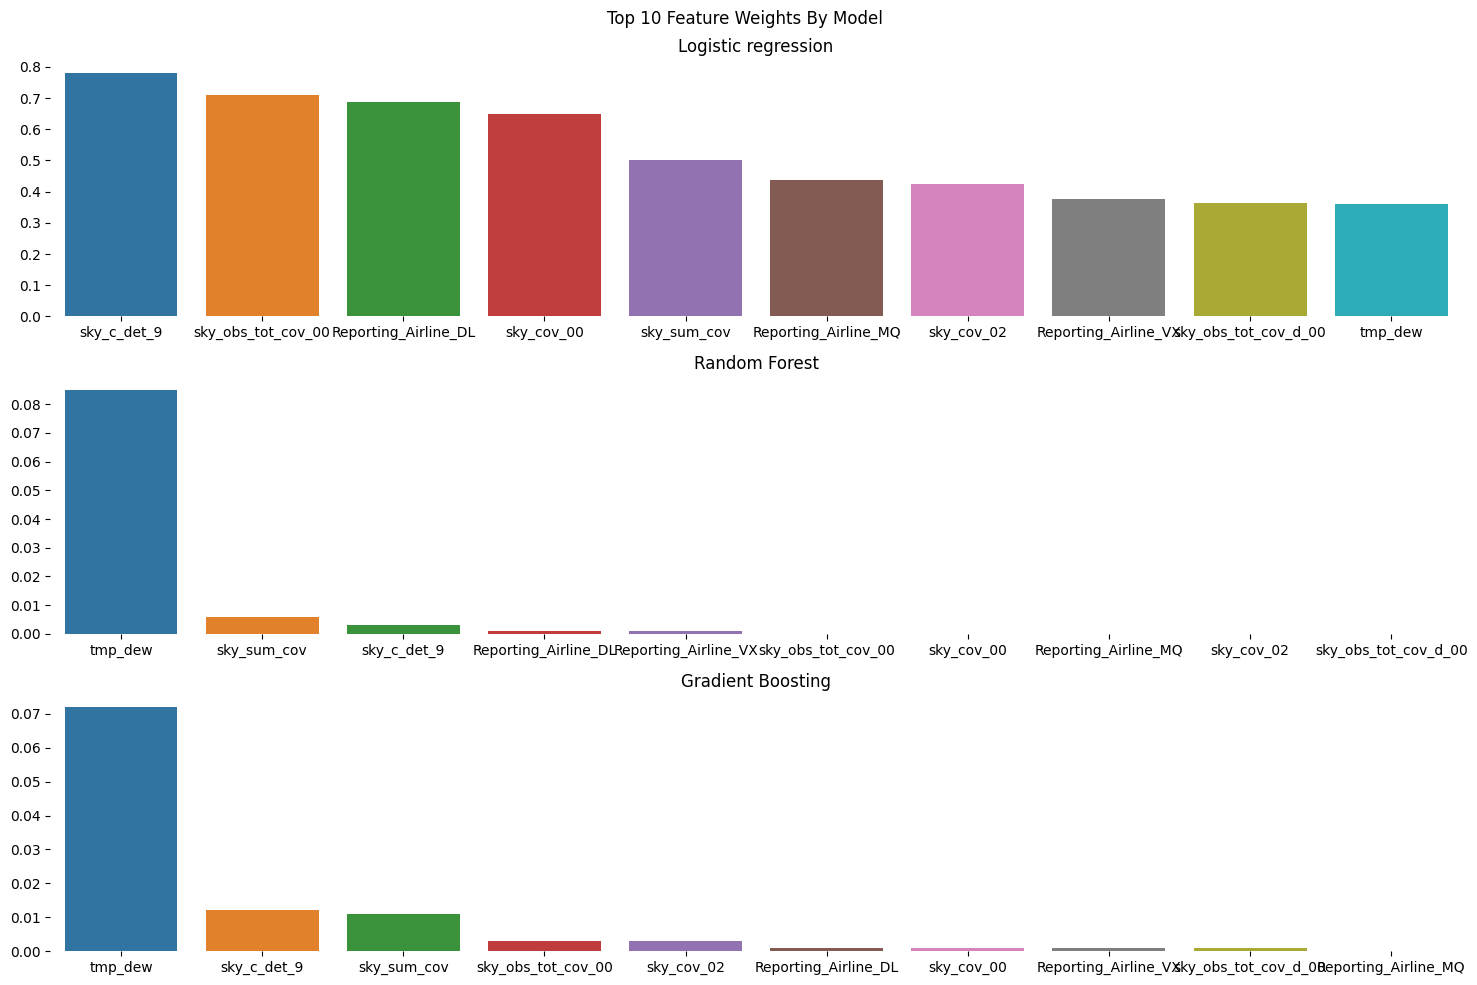

In [23]:
import re
fig, axes = plt.subplots(3,1,figsize=(15,10))
plt.subplots_adjust(hspace=0.1)

plt.suptitle("Top 10 Feature Weights By Model")
for idx,col in enumerate([ c for c in vars.columns if '_score' in c]):
  feats = abs(vars[col])[:10].index
  top = vars.loc[feats, col].sort_values(ascending=False)

  sns.barplot(x=top.index,
              y=top.values,
              ax=axes[idx])
  title = re.sub('_score','',col)
  axes[idx].set_title(title)
  axes[idx].set_ylabel('')
  axes[idx].set_xlabel('')
  for spine in axes[idx].spines:
    axes[idx].spines[spine].set_visible(False)
plt.tight_layout()


# The following plot is in seaborn; plotly down below,

In [29]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

names = [ c for c in vars.columns if '_score' in c]
titles = [re.sub('_score', '', m) + ' Top 10 Features by Training Weight' for m in names]
fig = go.Figure(
    layout=go.Layout(
        width=1500,
        height=800,
    ),
)



subplot_bar = make_subplots(rows=3, cols=1, specs=[[{"type": "bar"}] * 1] * 3, subplot_titles=titles, figure=fig)
for idx,col in enumerate(names):
  feats = abs(vars[col]).sort_values(ascending=False)[:10].index
  top = vars.loc[feats, col].sort_values(ascending=False)
  # top = vars[col].sort_values(ascending=False)[:10]
  subplot_bar.add_trace(go.Bar(x=top.index,y=top.values),row=idx+1, col=1)

for row in range(1, 4):
    subplot_bar.update_xaxes(showgrid=False, row=row, col=1)
    subplot_bar.update_yaxes(showgrid=False, row=row, col=1)

subplot_bar.update_layout(showlegend=False)
subplot_bar.show()

In [ ]:
# Reconfigure Dataframe to use Radar Graph
top_rf = vars['Random Forest_score'].sort_values(ascending=False)[:5]
top_gb = vars['Gradient Boosting_score'].sort_values(ascending=False)[:5]
feats = set(top_rf.index).union(set(top_gb.index))
weath = pd.DataFrame(data=top_rf.values.reshape(1,-1), columns=top_rf.index)
comb_scores = pd.concat([weath, pd.DataFrame(top_gb).T],axis=0)
comb_scores.fillna(0,inplace=True)
comb_scores['model'] = ['RF_score','GF_score']
comb_scores.reset_index(drop=True)
tst = pd.melt(comb_scores, id_vars='model', value_vars=comb_scores.columns)

In [ ]:
tst.head()

,model,variable,value
0,RF_score,sky_sum_hgt,0.200
1,GF_score,sky_sum_hgt,0.000
2,RF_score,tmp_dew,0.085
3,GF_score,tmp_dew,0.072
4,RF_score,sea_lvl_p,0.081


In [ ]:
# Plot the Radar Graph

df = pd.DataFrame(dict(
    # r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(tst, r='value', theta='variable', line_close=True, color='model', )

fig.show();

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Generalized Feature Importance

In [ ]:
models['Neural Network']['model'].named_steps['model'].model

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer

In [ ]:
models['Neural Network']['model']

Pipeline(steps=[('scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scalers', StandardScaler(),
                                                  ['CRSElapsedTime', 'Distance',
                                                   'passengers',
                                                   'OriginAirportSeqID',
                                                   'DestAirportSeqID',
                                                   'w_dir_angle',
                                                   'w_speed_rate', 'sky_c_hgt',
                                                   'vis_dist', 'tmp_air',
                                                   'tmp_dew', 'sea_lvl_p',
                                                   'liq_precip_qty',
                                                   'liq_precip_dim',
                                                   'sky_cov_base_hgt',
                                                   'sky_cov_cld', 'sky_sum...
                                                   'tmp_air_d', 'tmp_dew_d',
                                                   'sea_lvl_p_d',
                                                   'liq_precip_qty_d',
                                                   'liq_precip_dim_d', ...])],
                                   verbose_feature_names_out=False)),
                ('tensor', XTransform()),
                ('model',
                 KerasClassifier(batch_size=128, dropout_rate=0.001, epochs=100, learning_rate=0.005, model=<keras.engine.sequential.Sequential object at 0x7cd1e260bee0>, output_bias=-4.19656855, random_state=42, validation_split=0.2))])

In [ ]:
np.unique(y_test.values)

array([0, 1], dtype=int32)

In [ ]:
from tables.tests.common import test_filename
from sklearn.metrics import f1_score

def weighted_f1(y_true,predictions,model):
    if model == 'Neural Network':
      predictions = np.where(predictions > .5, 1, 0)
    f1_score_weighted = f1_score(y_true, predictions, average='weighted')
    return f1_score_weighted


for k,v in models.items():
  print(k)
  kwargs={'model':k}
  scorer = make_scorer(weighted_f1, greater_is_better=True,**kwargs)

  if k == 'Neural Network':
    curr_model = model
    X_data = X_test
  else:
    curr_model = v['model']
    X_data = test


  r = permutation_importance(curr_model,
                                X_data,
                                y_test,
                                scoring=scorer,
                                random_state=0
                            )
  models[k]['permutations'] = r.importances_mean

Logistic regression
Random Forest
Neural Network
1779/1779 [==============================] - 4s 2ms/step
Gradient Boosting


In [ ]:
# json.dump(models,open('/content/drive/Shareddrives/STUDENT-Capstone SS23/model_evaluation','w'))
permdict = {}
for k,v in models.items():
  if k == 'Neural Network':
    permdict[k] = dict(zip(nn_X_test.columns,models[k]['permutations']))
  else:
    permdict[k] = dict(zip(test.columns, models[k]['permutations']))

joblib.dump(permdict, files['Evaluation']['Feature_Eval'])

['/content/drive/Shareddrives/STUDENT-Capstone SS23/model_evaluation_w_features']

In [ ]:
tst.head()

,model,variable,value
0,RF_score,sky_sum_hgt,0.200
1,GF_score,sky_sum_hgt,0.000
2,RF_score,tmp_dew,0.085
3,GF_score,tmp_dew,0.072
4,RF_score,sea_lvl_p,0.081


In [31]:
permdict = joblib.load(files['Evaluation']['Feature_Eval'])
perm_df = pd.DataFrame(permdict)
perm_df.head()

,Logistic regression,Random Forest,Neural Network,Gradient Boosting
DestAirportSeqID,-0.000104,0.001132,0.004325,0.000133
DestStateFips,0.000008,0.000181,0.004546,-0.000085
CRSElapsedTime,-0.001590,0.000313,0.003933,-0.000314
Distance,0.000672,-0.000224,0.001052,-0.000146
OriginAirportSeqID,0.000000,0.000000,0.000000,0.000000


In [32]:
fig = go.Figure(
    layout=go.Layout(
        width=1500,
        height=800,
    ),
)


titles=list(permdict.keys())
subplot_bar = make_subplots(rows=4, cols=1, specs=[[{"type": "bar"}] * 1] * 4, subplot_titles=titles, shared_yaxes=True, figure=fig)
for idx,col in enumerate(perm_df.columns):
  feats = perm_df[col].sort_values(ascending=False)[:10].index
  top = perm_df.loc[feats, col].sort_values(ascending=False)
  # top = vars[col].sort_values(ascending=False)[:10]
  subplot_bar.add_trace(go.Bar(x=top.index,y=top.values),row=idx+1, col=1)

for row in range(1, 5):
    subplot_bar.update_xaxes(showgrid=False, row=row, col=1)
    subplot_bar.update_yaxes(showgrid=False, row=row, col=1)

subplot_bar.update_layout(showlegend=False, title='Top 10 Features by Permutation Importance on Test Set',title_x=0.5)
subplot_bar.show()

In [ ]:


airline_vars = ['Reporting_Airline_AA',
'Reporting_Airline_AS',
 'Reporting_Airline_B6',
 'Reporting_Airline_CO',
 'Reporting_Airline_DL',
 'Reporting_Airline_F9',
 'Reporting_Airline_FL',
 'Reporting_Airline_MQ',
 'Reporting_Airline_NK',
 'Reporting_Airline_UA',
 'Reporting_Airline_US',
 'Reporting_Airline_VX']

aircraft_vars = [ 'mfr_AIRBUS',
 'mfr_BOEING',
 'engine_type_Reciprocating',
 'engine_type_Turbofan',
 'engine_type_Turbojet',
 'passengers',
 'no_engines',]


origin_weather_vars = [
 'tmp_air','tmp_dew','sea_lvl_p','w_dir_angle','w_speed_rate','vis_dist',
 'liq_precip_qty','liq_precip_dim','liq_precip_cond','liq_precip_cond',
 'sky_cov_base_hgt','sky_cov_cld','sky_sum_cov','sky_sum_hgt','sky_low_cld_base_hgt',
 'at_pres_altimeter_rate','at_pres_stn_rate','w_type_9','w_type_C','w_type_N',
 'w_type_V','sky_c_det_9','sky_c_det_C','sky_c_det_M','sky_c_det_W','sky_cov_00',
 'sky_cov_02','sky_cov_04','sky_cov_07','sky_cov_08','sky_cov_09','sky_cov_10',
 'sky_obs_tot_cov_00','sky_obs_tot_cov_01','sky_obs_tot_cov_02','sky_obs_tot_cov_04',
 'sky_obs_tot_cov_06','sky_obs_tot_cov_07','sky_obs_tot_cov_08','sky_obs_tot_cov_09']


dest_weather_vars = [
'w_type_d_9','w_type_d_C','w_type_d_N','w_type_d_V','sky_c_det_d_9',
 'sky_c_det_d_C','sky_c_det_d_M','sky_c_det_d_W','sky_cov_d_00','sky_cov_d_02',
 'sky_cov_d_04','sky_cov_d_07','sky_cov_d_08','sky_cov_d_09','sky_cov_d_10',
 'sky_obs_tot_cov_d_00','sky_obs_tot_cov_d_01','sky_obs_tot_cov_d_02',
 'sky_obs_tot_cov_d_03','sky_obs_tot_cov_d_04','sky_obs_tot_cov_d_06',
 'sky_obs_tot_cov_d_07','sky_obs_tot_cov_d_08','sky_obs_tot_cov_d_09',
 'w_dir_angle_d','w_speed_rate_d','sky_c_hgt_d','vis_dist_d','tmp_air_d',
 'tmp_dew_d','sea_lvl_p_d','liq_precip_qty_d','liq_precip_dim_d',
 'liq_precip_cond_d','sky_cov_base_hgt_d','sky_cov_cld_d','sky_sum_cov_d',
 'sky_sum_hgt_d','sky_low_cld_base_hgt_d','at_pres_altimeter_rate_d',
 'at_pres_stn_rate_d']




flight_vars = ['Distance',
                'CRSElapsedTime',
                'OriginAirportSeqID',
                'CRSDepHour',
                'DestAirportSeqID',
                'DestStateFips',
                ]


def generateRadarGraph(filter_cols,title=None,log=False, aspect=800):
  filter_df = perm_long[perm_long['feature'].isin(filter_cols)]
  fig = px.line_polar(filter_df,
                      r='value',
                      theta='feature',
                      line_close=True,
                      color='model',
                      title=title,
                      width=aspect,
                      height=aspect)

  # print(len(filter_cols))
  if len(filter_cols) > 20:
    label_angles = [0 for x in range(len(filter_cols))]
    label_angles[22] = 90
    tick_vals = [f for f in filter_df.feature.unique()]

    fig.update_layout(polar=dict(
        angularaxis=dict(
            tickvals=tick_vals,
            tickangle=label_angles
        )
    ))

  # print(fig.layout.polar.angularaxis.t)

  fig.show();





In [ ]:
perm_df =perm_df.reset_index()
perm_df = perm_df.rename({'index':'feature'},axis=1)
perm_df.head()

,level_0,feature,feature,Logistic regression,Random Forest,Neural Network,Gradient Boosting
0,0,0,DestAirportSeqID,-0.000104,0.001132,0.004325,0.000133
1,1,1,DestStateFips,0.000008,0.000181,0.004546,-0.000085
2,2,2,CRSElapsedTime,-0.001590,0.000313,0.003933,-0.000314
3,3,3,Distance,0.000672,-0.000224,0.001052,-0.000146
4,4,4,OriginAirportSeqID,0.000000,0.000000,0.000000,0.000000


In [ ]:
perm_long = pd.melt(perm_df,id_vars='feature',
                    value_vars=models,
                    var_name='model'
                    )
perm_long.head()

,feature,model,value
0,DestAirportSeqID,Logistic regression,-0.000104
1,DestStateFips,Logistic regression,0.000008
2,CRSElapsedTime,Logistic regression,-0.001590
3,Distance,Logistic regression,0.000672
4,OriginAirportSeqID,Logistic regression,0.000000


In [ ]:
# Create viz for how each model emphasizes flight-related features
import warnings
warnings.filterwarnings("ignore")
filter_df = perm_long[perm_long['feature'].isin(flight_vars)]
fig = px.line_polar(filter_df, r='value', theta='feature', line_close=True, color='model',log_r=False )
fig.show();

In [ ]:
# Create viz for how each model emphasizes airlines features
generateRadarGraph(airline_vars,title='Airline Feature Comparison', log=False)

In [ ]:
generateRadarGraph(aircraft_vars, 'Aircraft Feature Comparison')

In [ ]:
fig = generateRadarGraph(origin_weather_vars,title='Origin (DFW) Weather Feature Comparison', aspect=1000)

ValueError: ignored

In [ ]:
generateRadarGraph(dest_weather_vars,aspect=1200)

<Axes: >

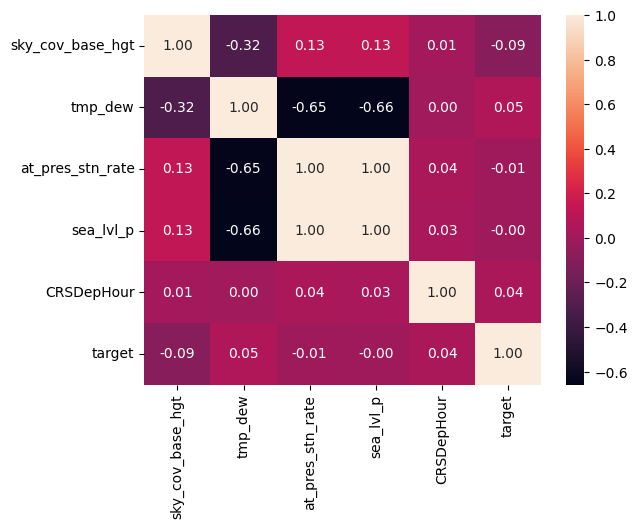

In [ ]:
# Check correlations of top features with target
check = test.copy()
check['target'] = y_test
sns.heatmap(check[list(top_gb.index.values) + ['target']].corr(),annot=True,fmt='.2f')

# Failure Analysis of GBC

In [ ]:
y_preds = models['Gradient Boosting']['model'].predict(test)

In [ ]:
all_cases = test_set.copy()
all_cases['true'] = y_test
all_cases['predict'] = y_preds
all_cases['fail'] = all_cases.apply(lambda x: 1 if x['true'] != x['predict'] else 0
                                    ,axis=1)

In [ ]:
fa = all_cases[all_cases['true'] != all_cases['predict']]

In [ ]:
fa.predict.value_counts()

1    1036
0     976
Name: predict, dtype: int64

In [ ]:
# Failed more positive predictions than negative (saw this earlier in CM).
# Review correlations on the 'fail' column for insight on which features most asscociated with failure
top_corr = abs(all_cases.corr()['fail']).sort_values(ascending=False)[4:14]
top_corr

<ipython-input-83-bc0d0fe26c9d>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



liq_precip_cond           0.203639
tmp_dew                   0.160831
at_pres_stn_rate          0.134965
at_pres_altimeter_rate    0.134822
sea_lvl_p                 0.132060
sky_sum_hgt               0.117988
sky_cov_base_hgt          0.117967
sky_low_cld_base_hgt      0.117634
CRSDepHour                0.112256
vis_dist                  0.106397
Name: fail, dtype: float64

In [ ]:
fig = px.histogram(all_cases,x='liq_precip_cond',color='fail')
fig.show()

In [ ]:
fig = px.histogram(all_cases,x='tmp_dew',color='fail')
# fig.update_xaxes(tickvals=[0, 100], ticktext=[0,1])
fig.show()

In [ ]:
fig = px.histogram(all_cases,x='tmp_dew',color='predict')
# fig.update_xaxes(tickvals=[0, 100], ticktext=[0,1])
fig.show()

The above plots all of the test prediction failures as a histogram of binned frequencies on the tmp_dew variable .  The colors blue as correct predictions or red as failures. We see a large number of failures as tmp_dew gets to very high levels(predicting 1 when it should be 0).  This implies that the temp_dew is not a linear predictor of weather delay but work in concert with other features. We saw earlier that there's a moderately strong inverse correlation with a couple of features from the correlation matrix plotted above. Let's see if there are any trends by plotting those two out.

In [ ]:
fig = px.scatter(all_cases,
                 x='tmp_dew',
                 y='sea_lvl_p',
                 color='fail')
fig.show()

In [ ]:
fig = px.scatter(all_cases,
                 x='tmp_dew',
                 y='at_pres_stn_rate',
                 color='fail')
fig.show()

In [ ]:
fig = px.scatter(all_cases[all_cases['fail']==1],
                 x='sea_lvl_p',
                 y='at_pres_stn_rate',
                 color='fail')
fig.show()

In [ ]:
fig = px.histogram(all_cases,
                 x='at_pres_stn_rate',
                 color='fail')
fig.show()

<Axes: >

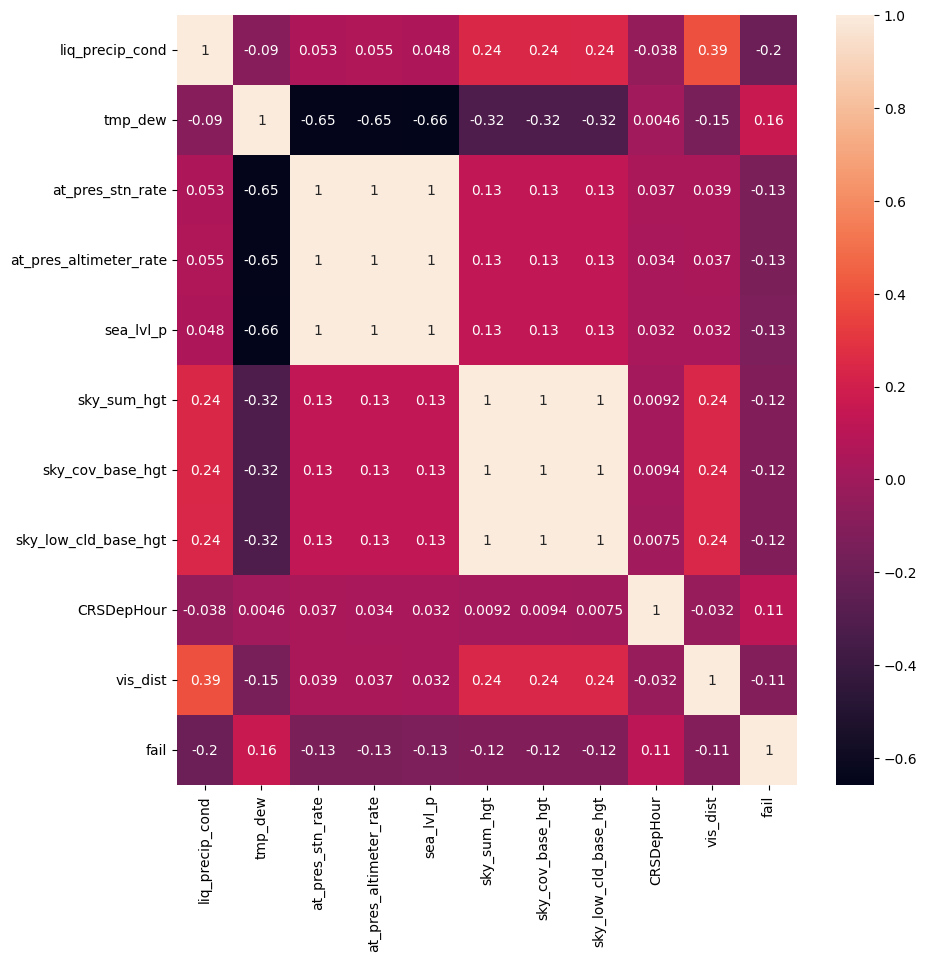

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(all_cases[top_corr.index.to_list() + ['fail']].corr(), annot=True)

In [ ]:
all_cases[['at_pres_stn_rate','at_pres_altimeter_rate','sea_lvl_p']]

,at_pres_stn_rate,at_pres_altimeter_rate,sea_lvl_p
0,9882,10098,10094
1,9879,10095,10089
2,9865,10081,10075
3,9919,10135,10132
4,10015,10234,10231
5,10005,10224,10221
6,9955,10173,10168
7,10028,10247,10246
8,10008,10227,10224
9,9948,10166,10160
